In [572]:
'''
Problem Statement

Title: Analyzing Factors Influencing Airline Passenger Satisfaction 
and Predicting Satisfaction Levels Using Decision Tree and CatBoost Models.

Objective:
The objective of this project is to identify the key factors that influence
airline passenger satisfaction and to develop predictive models to determine 
the satisfaction level of passengers.

Key Tasks:

1. Data Preprocessing:
   - Find Missing Values: Identifying and handle missing values in the dataset.
   - Clean the Dataset: Performing data cleaning to ensure data quality and consistency.

2. Feature Engineering:
   - Scaling and Encoding: Applying appropriate scaling techniques to numerical features 
                           and encode categorical variables to prepare the dataset for modeling.

3. Model Development:
   - Training and Testing:Splitting the dataset into training and testing sets to evaluate the models.
   - Model Training:Training Decision Tree and CatBoost models using the training data.
   - Model Evaluation:Evaluating the performance of the models based on accuracy, precision, recall, and F1 score.

4. Analysis and Interpretation:
   - Correlation Analysis: Identify the factors highly correlated with passenger satisfaction or dissatisfaction.
   - Predictive Modeling: Use the trained models to predict passenger satisfaction levels.

Data Description:
The dataset includes the following features:
- Demographics: Gender, Age
- Customer Profile:Customer Type (Loyal, Disloyal)
- Flight Details: Type of Travel (Personal, Business), Class (Business, Eco, Eco Plus), Flight Distance
- Service Ratings:Satisfaction levels of various services (e.g., Inflight WiFi, Food and Drink, Seat Comfort, Cleanliness)
- Operational Metrics:Departure/Arrival Delay in Minutes
- Satisfaction:Overall satisfaction level (Satisfaction, Neutral or Dissatisfaction)

'''

'\nProblem Statement\n\nTitle: Analyzing Factors Influencing Airline Passenger Satisfaction \nand Predicting Satisfaction Levels Using Decision Tree and CatBoost Models.\n\nObjective:\nThe objective of this project is to identify the key factors that influence\nairline passenger satisfaction and to develop predictive models to determine \nthe satisfaction level of passengers.\n\nKey Tasks:\n\n1. Data Preprocessing:\n   - Find Missing Values: Identifying and handle missing values in the dataset.\n   - Clean the Dataset: Performing data cleaning to ensure data quality and consistency.\n\n2. Feature Engineering:\n   - Scaling and Encoding: Applying appropriate scaling techniques to numerical features \n                           and encode categorical variables to prepare the dataset for modeling.\n\n3. Model Development:\n   - Training and Testing:Splitting the dataset into training and testing sets to evaluate the models.\n   - Model Training:Training Decision Tree and CatBoost models u

In [255]:
import numpy as np
import pandas as pd

In [257]:
#Using Decision Tree Classifier Machine Learning Algorithm 
#Reading the train data set.
df1 = pd.read_csv("C://Users//HP//Downloads//train.csv")

In [259]:
#Reading the test data set.
df2 = pd.read_csv("C://Users//HP//Downloads//test.csv")

In [261]:
#To verify the correct loading of train data set
df1.tail(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103894,103894,86549,Male,Loyal Customer,26,Business travel,Business,712,4,4,...,5,3,4,4,3,4,5,17,26.0,satisfied
103895,103895,66030,Female,disloyal Customer,24,Business travel,Eco,1055,1,1,...,1,3,3,5,5,4,1,13,10.0,neutral or dissatisfied
103896,103896,71445,Male,Loyal Customer,57,Business travel,Eco,867,4,5,...,4,3,4,3,1,3,4,0,0.0,neutral or dissatisfied
103897,103897,102203,Female,Loyal Customer,60,Business travel,Business,1599,5,5,...,4,4,4,4,4,4,4,9,7.0,satisfied
103898,103898,60666,Male,Loyal Customer,50,Personal Travel,Eco,1620,3,1,...,2,4,3,4,2,4,2,0,0.0,neutral or dissatisfied
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [263]:
#To verify the correct loading of test data set
df2.tail(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
25966,25966,30263,Male,disloyal Customer,42,Business travel,Eco,1024,4,4,...,3,3,1,2,2,3,3,0,17.0,neutral or dissatisfied
25967,25967,90347,Female,disloyal Customer,39,Business travel,Business,404,1,1,...,2,5,3,4,4,4,2,0,0.0,neutral or dissatisfied
25968,25968,86816,Male,Loyal Customer,41,Business travel,Eco,692,2,2,...,2,2,3,3,2,3,2,15,3.0,neutral or dissatisfied
25969,25969,120654,Male,Loyal Customer,52,Business travel,Business,280,3,3,...,4,4,4,4,3,4,3,0,0.0,satisfied
25970,25970,25309,Female,disloyal Customer,36,Business travel,Eco,432,1,5,...,4,5,2,5,2,3,4,0,0.0,neutral or dissatisfied
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
25975,25975,34799,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


In [265]:
#Checking data types of variables in train data set
df1.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [267]:
#Checking data types of variables in test data set
df2.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [269]:
#Finding the Variable Names in the train data set
df1.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [271]:
#Finding the Variable Names in the test data set
df2.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [273]:
#Checking the missing values in train data set
df1.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [275]:
#Finding with mean in "Arrival Delay in Minutes"
round(df1['Arrival Delay in Minutes'].mean(),0)

15.0

In [277]:
#Imputation with mean in "Arrival Delay in Minutes"
df1['Arrival Delay in Minutes'].fillna(15,inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3724\330015645.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Arrival Delay in Minutes'].fillna(15,inplace = True)


In [279]:
#Checking again the missing values in the train data set
df1.isna().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [281]:
#Checking the missing values in test data set
df2.isna().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [283]:
#Finding with mean in "Arrival Delay in Minutes"
round(df2['Arrival Delay in Minutes'].mean(),0)

15.0

In [285]:
#Imputation with mean in "Arrival Delay in Minutes"
df2['Arrival Delay in Minutes'].fillna(15,inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3724\1441958536.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Arrival Delay in Minutes'].fillna(15,inplace = True)


In [35]:
#Checking again the missing values in the test data set
df2.isna().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [287]:
#Dropping the Varibales named "Unnamed: 0 " and "id" from train data set
df1.drop(['Unnamed: 0'],axis=1,inplace=True)
df1.drop(['id'],axis=1,inplace=True)

In [289]:
df1.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [291]:
#Dropping the Varibales named "Unnamed: 0 " and "id" from test data set
df2.drop(['Unnamed: 0'],axis=1,inplace=True)
df2.drop(['id'],axis=1,inplace=True)

In [293]:
df2.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [295]:
#Performing Encoding
from sklearn.preprocessing import LabelEncoder

In [297]:
le = LabelEncoder()

In [341]:
#Encoding "Customer Type", "Type of Travel", "Class", "satisfaction" from train data set
df1['Customer Type'] = le.fit_transform(df1['Customer Type'])
df1['Type of Travel'] = le.fit_transform(df1['Type of Travel'])
df1['Class'] = le.fit_transform(df1['Class'])
df1['satisfaction'] = le.fit_transform(df1['satisfaction'])
df1['Gender'] = le.fit_transform(df1['Gender'])

In [343]:
df1.tail(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,0,1,23,0,1,-1.000307,2,1,2,3,...,2,3,1,4,2,3,2,-0.309061,-0.392802,0
103900,1,0,49,0,0,1.160869,4,4,4,4,...,5,5,5,5,5,5,4,-0.387532,-0.392802,1
103901,1,1,30,0,0,0.807860,1,1,1,3,...,4,3,2,4,5,5,4,-0.204433,-0.030490,0
103902,0,1,22,0,1,-0.189991,1,1,1,5,...,1,4,5,1,5,4,1,-0.387532,-0.392802,0
103903,1,0,27,0,0,0.535081,1,3,3,3,...,1,1,1,4,4,3,1,-0.387532,-0.392802,0


In [459]:
#Encoding "Customer Type", "Type of Travel", "Class", "satisfaction" from test data set
df2['Customer Type'] = le.fit_transform(df2['Customer Type'])
df2['Type of Travel'] = le.fit_transform(df2['Type of Travel'])
df2['Class'] = le.fit_transform(df2['Class'])
df2['satisfaction'] = le.fit_transform(df2['satisfaction'])
df2['Gender'] = le.fit_transform(df2['Gender'])

In [463]:
df2.tail(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Customer
25971,1,1,34,0,0,-0.668681,3,3,3,1,...,3,2,4,4,5,4,-0.382286,-0.393565,0,1
25972,1,0,23,0,0,-0.548521,4,4,4,4,...,4,5,5,5,5,4,-0.382286,-0.393565,1,0
25973,0,0,17,1,1,-0.366278,2,5,1,5,...,4,3,4,5,4,2,-0.382286,-0.393565,0,0
25974,1,0,14,0,0,-0.066878,3,3,3,3,...,3,2,5,4,5,4,-0.382286,-0.393565,1,0
25975,0,0,42,1,1,-0.931032,2,5,2,5,...,1,2,1,1,1,1,-0.382286,-0.393565,0,0


In [465]:
#Performing scaling
from sklearn.preprocessing import StandardScaler

In [467]:
ss = StandardScaler()

In [469]:
#scaling "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes" in train data set
df1['Flight Distance']=ss.fit_transform(df1[['Flight Distance']])
df1['Departure Delay in Minutes']=ss.fit_transform(df1[['Departure Delay in Minutes']])
df1['Arrival Delay in Minutes']=ss.fit_transform(df1[['Arrival Delay in Minutes']])

In [471]:
df1.tail()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,0,1,23,0,1,-1.000307,2,1,2,3,...,2,3,1,4,2,3,2,-0.309061,-0.392802,0
103900,1,0,49,0,0,1.160869,4,4,4,4,...,5,5,5,5,5,5,4,-0.387532,-0.392802,1
103901,1,1,30,0,0,0.807860,1,1,1,3,...,4,3,2,4,5,5,4,-0.204433,-0.030490,0
103902,0,1,22,0,1,-0.189991,1,1,1,5,...,1,4,5,1,5,4,1,-0.387532,-0.392802,0
103903,1,0,27,0,0,0.535081,1,3,3,3,...,1,1,1,4,4,3,1,-0.387532,-0.392802,0


In [473]:
#scaling "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes" in test data set
df2['Flight Distance']=ss.fit_transform(df2[['Flight Distance']])
df2['Departure Delay in Minutes']=ss.fit_transform(df2[['Departure Delay in Minutes']])
df2['Arrival Delay in Minutes']=ss.fit_transform(df2[['Arrival Delay in Minutes']])

In [475]:
df2.tail()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Customer
25971,1,1,34,0,0,-0.668681,3,3,3,1,...,3,2,4,4,5,4,-0.382286,-0.393565,0,1
25972,1,0,23,0,0,-0.548521,4,4,4,4,...,4,5,5,5,5,4,-0.382286,-0.393565,1,0
25973,0,0,17,1,1,-0.366278,2,5,1,5,...,4,3,4,5,4,2,-0.382286,-0.393565,0,0
25974,1,0,14,0,0,-0.066878,3,3,3,3,...,3,2,5,4,5,4,-0.382286,-0.393565,1,0
25975,0,0,42,1,1,-0.931032,2,5,2,5,...,1,2,1,1,1,1,-0.382286,-0.393565,0,0


In [477]:
df1.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [479]:
#Dividing the data set into training and testing
from sklearn.model_selection import train_test_split

In [481]:
#defining the independent and dependent variable from train data set
X = ['Gender','Customer Type','Class','Type of Travel','Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
Y = 'satisfaction'

In [483]:
# Extract X and Y from training set
X_train = df1[X]
Y_train = df1[Y]

In [552]:
X_train.columns

Index(['Gender', 'Customer Type', 'Class', 'Type of Travel', 'Age',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [485]:
# Extract X and Y from testing set
X_test = df2[X]
Y_test = df2[Y]

In [548]:
X_train.head(2)

,Gender,Customer Type,Class,Type of Travel,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,2,1,13,-0.731539,3,4,3,1,...,5,5,4,3,4,4,5,5,0.266393,0.073028
1,1,1,0,0,25,-0.957184,3,2,3,3,...,1,1,1,5,3,1,4,1,-0.361375,-0.237525


In [487]:
X_train.head()

,Gender,Customer Type,Class,Type of Travel,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,2,1,13,-0.731539,3,4,3,1,...,5,5,4,3,4,4,5,5,0.266393,0.073028
1,1,1,0,0,25,-0.957184,3,2,3,3,...,1,1,1,5,3,1,4,1,-0.361375,-0.237525
2,0,0,0,0,26,-0.047584,2,2,2,2,...,5,5,4,3,4,4,4,5,-0.387532,-0.392802
3,0,0,0,0,25,-0.629246,2,5,5,5,...,2,2,2,5,3,1,4,2,-0.099805,-0.159887
4,1,0,0,0,61,-0.978244,3,3,3,3,...,5,3,3,4,4,3,3,3,-0.387532,-0.392802


In [489]:
from sklearn.tree import DecisionTreeClassifier as dtree

In [491]:
ct = dtree()

In [493]:
ct.fit(X_train,Y_train)

DecisionTreeClassifier()

In [495]:
Y_pred = ct.predict(X_test)

In [497]:
Y_pred

array([1, 1, 0, ..., 0, 1, 0])

In [499]:
Y_test

0        1
1        1
2        0
3        1
4        1
        ..
25971    0
25972    1
25973    0
25974    1
25975    0
Name: satisfaction, Length: 25976, dtype: int64

In [501]:
#machine learning performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [503]:
print ("Decision Tree Classifier...")
print("accuracy: ",accuracy_score(Y_pred,Y_test), "precision: ", precision_score(Y_pred,Y_test), "recall: ", recall_score(Y_pred,Y_test), "F1 score: ", f1_score(Y_pred,Y_test))

Decision Tree Classifier...
accuracy:  0.9476054819833692 precision:  0.940629658861703 recall:  0.9400525854513585 F1 score:  0.9403410336211809


In [505]:
ct.feature_importances_

array([0.00202993, 0.04054042, 0.02189205, 0.14683617, 0.0229609 ,
       0.02323904, 0.17870102, 0.00534095, 0.00350622, 0.02221149,
       0.00435014, 0.36229063, 0.01569943, 0.04716882, 0.00821291,
       0.01197888, 0.01479484, 0.02743573, 0.01578725, 0.00882195,
       0.0071754 , 0.00902581])

In [507]:
feature_imp = pd.Series(ct.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Online boarding                      0.362291
Inflight wifi service                0.178701
Type of Travel                       0.146836
Inflight entertainment               0.047169
Customer Type                        0.040540
Checkin service                      0.027436
Flight Distance                      0.023239
Age                                  0.022961
Gate location                        0.022211
Class                                0.021892
Inflight service                     0.015787
Seat comfort                         0.015699
Baggage handling                     0.014795
Leg room service                     0.011979
Arrival Delay in Minutes             0.009026
Cleanliness                          0.008822
On-board service                     0.008213
Departure Delay in Minutes           0.007175
Departure/Arrival time convenient    0.005341
Food and drink                       0.004350
Ease of Online booking               0.003506
Gender                            

In [509]:
feature_imp.index

Index(['Online boarding', 'Inflight wifi service', 'Type of Travel',
       'Inflight entertainment', 'Customer Type', 'Checkin service',
       'Flight Distance', 'Age', 'Gate location', 'Class', 'Inflight service',
       'Seat comfort', 'Baggage handling', 'Leg room service',
       'Arrival Delay in Minutes', 'Cleanliness', 'On-board service',
       'Departure Delay in Minutes', 'Departure/Arrival time convenient',
       'Food and drink', 'Ease of Online booking', 'Gender'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


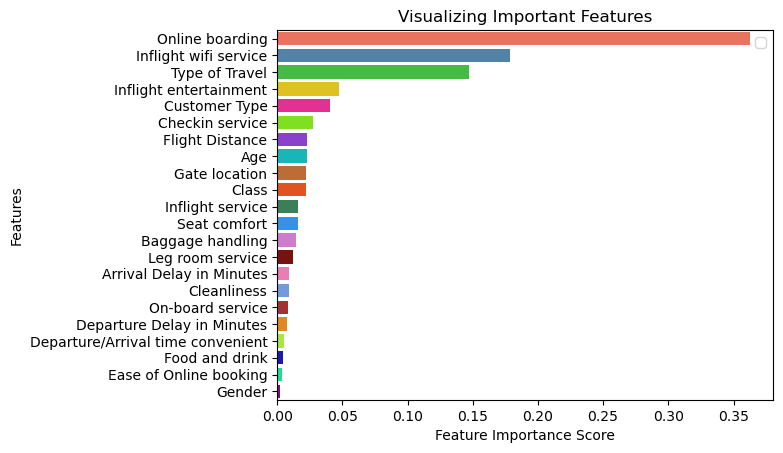

In [511]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
custom_colors = [
    "#FF6347", "#4682B4", "#32CD32", "#FFD700", "#FF1493", "#7FFF00", 
    "#8A2BE2", "#00CED1", "#D2691E", "#FF4500", "#2E8B57", "#1E90FF", "#DA70D6",
    "#8B0000", "#FF69B4", "#6495ED", "#B22222", "#FF8C00", "#ADFF2F", "#0000CD", 
    "#00FA9A", "#8B008B"]
sns.barplot(x=feature_imp, y=feature_imp.index,hue=feature_imp.index, palette=custom_colors)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [513]:
from sklearn.tree import plot_tree

[Text(0.5, 0.875, 'node #0\nInflight service <= 3.5\ngini = 0.491\nsamples = 103904\nvalue = [58879, 45025]\nclass = 0'),
 Text(0.25, 0.625, 'node #1\nFlight Distance <= 0.5\ngini = 0.253\nsamples = 52429\nvalue = [44627, 7802]\nclass = 0'),
 Text(0.125, 0.375, 'node #2\nFood and drink <= 0.5\ngini = 0.009\nsamples = 1768\nvalue = [8, 1760]\nclass = 1'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'node #5\nFlight Distance <= 3.5\ngini = 0.21\nsamples = 50661\nvalue = [44619, 6042]\nclass = 0'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'node #2672\nInflight entertainment <= 0.5\ngini = 0.4\nsamples = 51475\nvalue = [14252.0, 37223.0]\nclass = 1'),
 Text(0.625, 0.375, 'node #2673\nLeg room service <= 3.5\ngini = 0.254\nsamples = 40983\nvalue = [6107, 34876]\nclass = 1'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'node #5868

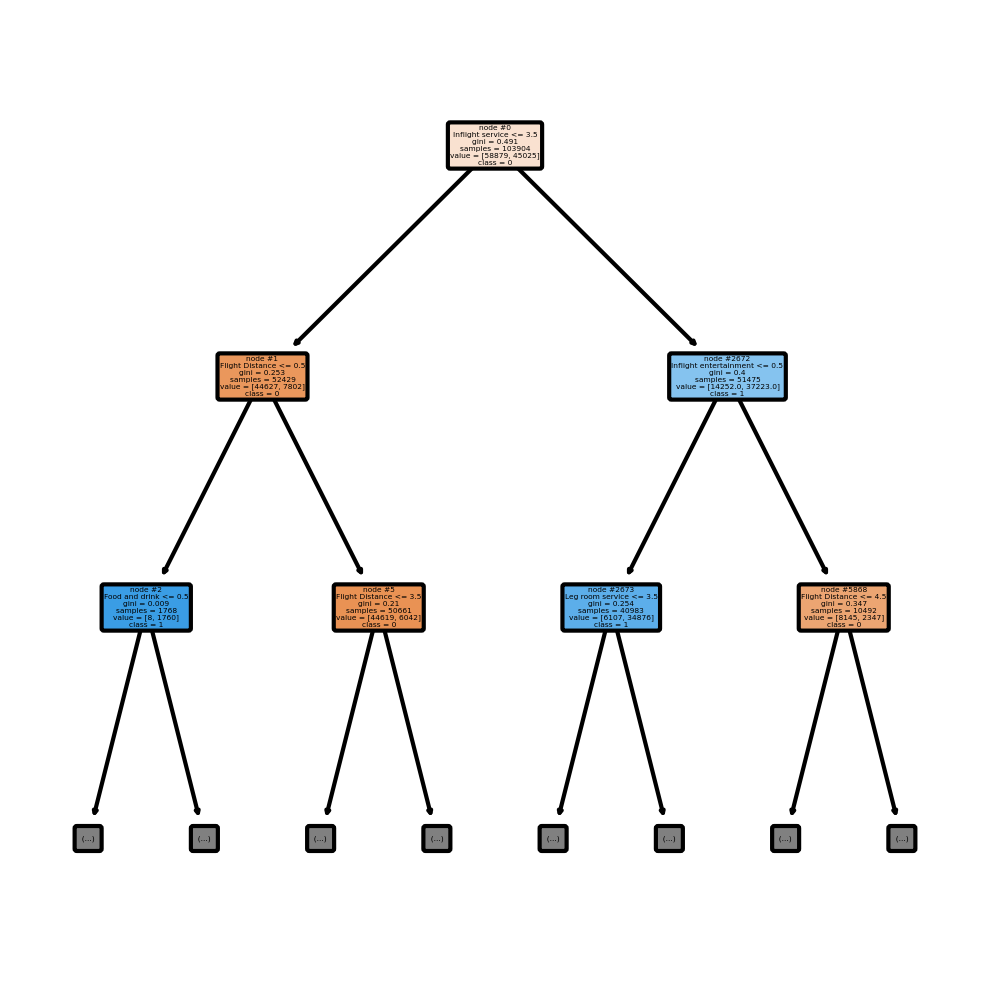

In [515]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(ct, max_depth = 2,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['Online boarding', 'Inflight wifi service', 'Type of Travel_Enc',
       'Inflight entertainment', 'Customer Type_Enc', 'Checkin service',
       'Flight Distance', 'Age', 'Gate location', 'Class_Enc', 'Seat comfort',
       'Inflight service', 'Baggage handling', 'Leg room service',
       'Arrival Delay in Minutes', 'Cleanliness', 'On-board service',
       'Departure Delay in Minutes', 'Departure/Arrival time convenient',
       'Food and drink', 'Ease of Online booking', 'Gender_Enc'],
            class_names = ["0","1"]
              )

In [517]:
#For checking the rules governing the Decision Tree Classifer
from sklearn.tree import export_text

In [519]:
tree_rules = export_text(ct, feature_names=list(X_train.columns))

In [521]:
print(tree_rules)

|--- Online boarding <= 3.50
|   |--- Inflight wifi service <= 0.50
|   |   |--- Cleanliness <= 0.50
|   |   |   |--- class: 0
|   |   |--- Cleanliness >  0.50
|   |   |   |--- class: 1
|   |--- Inflight wifi service >  0.50
|   |   |--- Inflight wifi service <= 3.50
|   |   |   |--- Class <= 0.50
|   |   |   |   |--- Inflight entertainment <= 3.50
|   |   |   |   |   |--- Cleanliness <= 4.50
|   |   |   |   |   |   |--- Gate location <= 3.50
|   |   |   |   |   |   |   |--- Inflight entertainment <= 1.50
|   |   |   |   |   |   |   |   |--- On-board service <= 4.50
|   |   |   |   |   |   |   |   |   |--- Seat comfort <= 4.50
|   |   |   |   |   |   |   |   |   |   |--- Inflight wifi service <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- Inflight wifi service >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 15
|   |   |   |   |   |   |   |   |   |--- Seat comfort >  4.5

In [523]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] for i in tree_.feature
    ]

    paths = []
    path = []

    def recurse(node, path, paths):

        if str(tree_.feature[node]).isnumeric() == True:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]

    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]

    rules = []
    for path in paths:
        rule = "if "

        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]

    return rules

In [525]:
#Print rules
rules = get_rules(ct, X_train.columns, None)
for r in rules:
    print(r)

if (Online boarding <= 3.5) and (Inflight wifi service > 0.5) and (Inflight wifi service <= 3.5) and (Class > 0.5) and (Ease of Online booking <= 3.5) and (Type of Travel > 0.5) then response: 1.0 | based on 19,120 samples
if (Online boarding > 3.5) and (Type of Travel <= 0.5) and (Inflight entertainment > 3.5) and (Customer Type <= 0.5) and (Checkin service > 2.5) and (Class <= 0.5) and (Baggage handling > 3.5) and (Cleanliness > 2.5) and (On-board service > 2.5) and (Seat comfort > 3.5) and (Inflight service > 3.5) and (Leg room service > 0.5) and (Food and drink > 1.5) and (Leg room service > 1.5) and (Age <= 78.5) and (Inflight wifi service <= 3.5) then response: 0.0 | based on 11,933 samples
if (Online boarding > 3.5) and (Type of Travel <= 0.5) and (Inflight entertainment > 3.5) and (Customer Type <= 0.5) and (Checkin service > 2.5) and (Class <= 0.5) and (Baggage handling > 3.5) and (Cleanliness > 2.5) and (On-board service > 2.5) and (Seat comfort > 3.5) and (Inflight service >

In [527]:
#Using CATBoost Machine Learning Algorithm 
from catboost import CatBoostClassifier

In [528]:
cat = CatBoostClassifier()

In [531]:
cat.fit(X_train, Y_train)
 
# Predict on test set
Y_pred1 = cat.predict(X_test)
 
# accuracy
acc_cat = accuracy_score(Y_test, Y_pred1)
print("Cat Boosting Classifier accuracy is : {:.2f}".format(acc_cat))

Learning rate set to 0.074823
0:	learn: 0.5936251	total: 13.7ms	remaining: 13.7s
1:	learn: 0.4956065	total: 27.6ms	remaining: 13.8s
2:	learn: 0.4383490	total: 41.3ms	remaining: 13.7s
3:	learn: 0.3899798	total: 54ms	remaining: 13.5s
4:	learn: 0.3571228	total: 66.5ms	remaining: 13.2s
5:	learn: 0.3134746	total: 80.3ms	remaining: 13.3s
6:	learn: 0.2931862	total: 93.9ms	remaining: 13.3s
7:	learn: 0.2725044	total: 108ms	remaining: 13.4s
8:	learn: 0.2561124	total: 122ms	remaining: 13.4s
9:	learn: 0.2429813	total: 135ms	remaining: 13.4s
10:	learn: 0.2279182	total: 148ms	remaining: 13.3s
11:	learn: 0.2138925	total: 163ms	remaining: 13.4s
12:	learn: 0.2071570	total: 177ms	remaining: 13.4s
13:	learn: 0.2006550	total: 190ms	remaining: 13.4s
14:	learn: 0.1931766	total: 204ms	remaining: 13.4s
15:	learn: 0.1882974	total: 218ms	remaining: 13.4s
16:	learn: 0.1849195	total: 250ms	remaining: 14.5s
17:	learn: 0.1783188	total: 273ms	remaining: 14.9s
18:	learn: 0.1746973	total: 287ms	remaining: 14.8s
19:	le

In [532]:
print ("CATBoost Classifier...")
print("accuracy: ",accuracy_score(Y_pred1,Y_test), "precision: ", precision_score(Y_pred1,Y_test), "recall: ", recall_score(Y_pred1,Y_test), "F1 score: ", f1_score(Y_pred1,Y_test))

CATBoost Classifier...
accuracy:  0.9641592238989837 precision:  0.9459791282995703 recall:  0.9716267339218159 F1 score:  0.9586314152410575


In [533]:
feature_imp1 = pd.Series(cat.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp1

Inflight wifi service                26.546628
Type of Travel                       18.677019
Online boarding                       7.422800
Customer Type                         6.852076
Class                                 5.359130
Checkin service                       3.819234
Gate location                         3.671900
Age                                   3.660020
Baggage handling                      3.405087
Seat comfort                          3.137863
Inflight entertainment                3.087262
Inflight service                      2.757476
Cleanliness                           2.108921
Flight Distance                       1.802552
Departure/Arrival time convenient     1.737239
On-board service                      1.555545
Ease of Online booking                1.464854
Leg room service                      1.355681
Arrival Delay in Minutes              0.719334
Departure Delay in Minutes            0.433472
Food and drink                        0.324310
Gender       

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


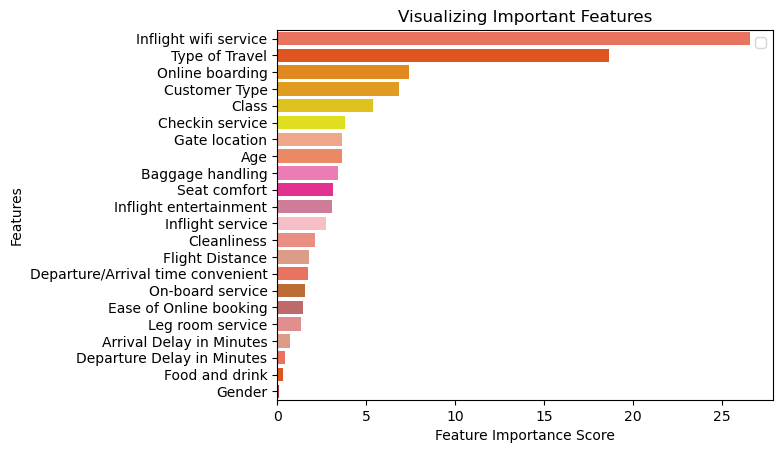

In [536]:
#visualizing feature importance results
# Creating a bar plot
custom_warm_colors = [
    "#FF6347",  # Tomato
    "#FF4500",  # OrangeRed
    "#FF8C00",  # DarkOrange
    "#FFA500",  # Orange
    "#FFD700",  # Gold
    "#FFFF00",  # Yellow
    "#FFA07A",  # LightSalmon
    "#FF7F50",  # Coral
    "#FF69B4",  # HotPink
    "#FF1493",  # DeepPink
    "#DB7093",  # PaleVioletRed
    "#FFB6C1",  # LightPink
    "#FA8072",  # Salmon
    "#E9967A",  # DarkSalmon
    "#FF6347",  # Tomato
    "#D2691E",  # Chocolate
    "#CD5C5C",  # IndianRed
    "#F08080",  # LightCoral
    "#E9967A",  # DarkSalmon
    "#FF6347",  # Tomato
    "#FF4500",  # OrangeRed
    "#B22222"   # FireBrick
]

sns.barplot(x=feature_imp1, y=feature_imp1.index,hue=feature_imp1.index, palette=custom_warm_colors)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [564]:
#Reading new record to predict
new_data = pd.read_excel("C://Users//HP//OneDrive//Desktop//New_Data_Satisfaction.xlsx")

In [566]:
new_data


,Gender,Customer Type,Class,Type of Travel,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,1,1,52,160,5,4,3,4,...,3,5,5,5,5,2,5,5,50,44


In [568]:
#Predicting the Customer Churn using Random Forest Algorithm
ct.predict(new_data)

array([1])

In [570]:
#Predicting the Customer Churn using CATboost
cat.predict(new_data)

array([1], dtype=int64)

In [576]:
'''
Observations and Model Performance-

Decision Tree Classifier

Performance Metrics:
- Accuracy:0.9476
- Precision:0.9406
- Recall:0.9401
- F1 Score:0.9403

Important Features:
1. Online boarding: 0.3623
2. Inflight wifi service: 0.1787
3. Type of Travel: 0.1468
4. Inflight entertainment: 0.0472
5. Customer Type: 0.0405
6. Checkin service: 0.0274
7. Flight Distance: 0.0232
8. Age: 0.0230
9. Gate location: 0.0222
10. Class: 0.0219

Other Features:
- The remaining features have lesser importance, with weights ranging from 0.0158 to 0.0020.

CatBoost Classifier

Performance Metrics:
- Accuracy: 0.9641
- Precision: 0.9459
- Recall: 0.9716
- F1 Score: 0.9561

Important Features:
1. Inflight wifi service: 26.5466
2. Type of Travel: 18.6770
3. Online boarding: 7.4228
4. Customer Type: 6.8521
5. Class: 5.3591
6. Checkin service: 3.8192
7. Gate location: 3.6719
8. Age: 3.6600
9. Baggage handling: 3.4051
10. Seat comfort: 3.1379

Other Features:
- The remaining features have lesser importance, with weights ranging from 3.0873 to 0.1016.

Observations

1. Key Features:
   - Both models highlight the importance of Online boarding, Inflight wifi service, and Type of Travel 
        as significant predictors of passenger satisfaction.
   - Customer Type and Class are also consistently important across both models.
   - The Decision Tree model gives more importance to Inflight entertainment compared to the CatBoost model.

2. Performance:
   - The CATBoost Classifier shows strong performance with high accuracy, precision, recall, and F1 score.
   
3. When both the models are fed with a new data set to check whether the models are correctly predicting or not,
   it was found that it has been correctly predicted by both models, respectively.
   '''

'\nObservations and Model Performance-\n\nDecision Tree Classifier\n\nPerformance Metrics:\n- Accuracy:0.9476\n- Precision:0.9406\n- Recall:0.9401\n- F1 Score:0.9403\n\nImportant Features:\n1. Online boarding: 0.3623\n2. Inflight wifi service: 0.1787\n3. Type of Travel: 0.1468\n4. Inflight entertainment: 0.0472\n5. Customer Type: 0.0405\n6. Checkin service: 0.0274\n7. Flight Distance: 0.0232\n8. Age: 0.0230\n9. Gate location: 0.0222\n10. Class: 0.0219\n\nOther Features:\n- The remaining features have lesser importance, with weights ranging from 0.0158 to 0.0020.\n\nCatBoost Classifier\n\nPerformance Metrics:\n- Accuracy: 0.9641\n- Precision: 0.9459\n- Recall: 0.9716\n- F1 Score: 0.9561\n\nImportant Features:\n1. Inflight wifi service: 26.5466\n2. Type of Travel: 18.6770\n3. Online boarding: 7.4228\n4. Customer Type: 6.8521\n5. Class: 5.3591\n6. Checkin service: 3.8192\n7. Gate location: 3.6719\n8. Age: 3.6600\n9. Baggage handling: 3.4051\n10. Seat comfort: 3.1379\n\nOther Features:\n- 